Project machine learning \\
DAMMAK iyed 

Data extraction 

In [344]:
#pip install seaborn 

In [345]:
#pip install scikit-learn

In [346]:
#pip install pandas 

In [347]:
#pip install matplotlib

In [348]:
#important import
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
data=[]
with open('kidney_disease.csv', "r") as doc:
    next(doc) 
    for line in doc:
        line=line.replace('\n','')
        data.append(line.split(','))

#print( data)
names=['id','age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']
df= pd.DataFrame(data, columns=names )
df


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,,normal,notpresent,notpresent,...,38,6000,,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [350]:
# see the first columns to get familiar with the data 
num_rows_to_see=10
df.head(num_rows_to_see)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,,normal,notpresent,notpresent,...,38,6000,,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,,,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.01,0.0,0.0,,normal,notpresent,notpresent,...,36,,,no,no,no,good,no,no,ckd
7,7,24.0,,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.02,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [351]:
df = df.drop('id', axis=1)  # Cela supprime la colonne 'id'
names=['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']


Note that the are missing values in the data set \n
This is suspectious; For that we prefer to get the set of values for each column 

In [352]:
# get the columns of the data frame and see the set of values for each column 
for col in df.columns: 
    print(f'The values of {col} are = \n', df[col].unique())




The values of age are = 
 ['48.0' '7.0' '62.0' '51.0' '60.0' '68.0' '24.0' '52.0' '53.0' '50.0'
 '63.0' '40.0' '47.0' '61.0' '21.0' '42.0' '75.0' '69.0' '' '73.0' '70.0'
 '65.0' '76.0' '72.0' '82.0' '46.0' '45.0' '35.0' '54.0' '11.0' '59.0'
 '67.0' '15.0' '55.0' '44.0' '26.0' '64.0' '56.0' '5.0' '74.0' '38.0'
 '58.0' '71.0' '34.0' '17.0' '12.0' '43.0' '41.0' '57.0' '8.0' '39.0'
 '66.0' '81.0' '14.0' '27.0' '83.0' '30.0' '4.0' '3.0' '6.0' '32.0' '80.0'
 '49.0' '90.0' '78.0' '19.0' '2.0' '33.0' '36.0' '37.0' '23.0' '25.0'
 '20.0' '29.0' '28.0' '22.0' '79.0']
The values of bp are = 
 ['80.0' '50.0' '70.0' '90.0' '' '100.0' '60.0' '110.0' '140.0' '180.0'
 '120.0']
The values of sg are = 
 ['1.02' '1.01' '1.005' '1.015' '' '1.025']
The values of al are = 
 ['1.0' '4.0' '2.0' '3.0' '0.0' '' '5.0']
The values of su are = 
 ['0.0' '3.0' '4.0' '1.0' '' '2.0' '5.0']
The values of rbc are = 
 ['' 'normal' 'abnormal']
The values of pc are = 
 ['normal' 'abnormal' '']
The values of pcc are = 
 ['no

there is some abnormal values in wc

In [353]:
# remove unwanted caracters like tabs and question marks
for col in df.columns:
    # Step 1: Clean unwanted characters
    df[col] = df[col].replace(r'\t|\?| ', '', regex=True)  # Remove tabs and question marks
    df[col] = df[col].replace('', np.nan, regex=True)
# convert numerical calumns to float 
numerical_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for col in numerical_columns:
    # Convert to numeric, forcing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    
    # Handle NaN values (choose one of the options below) Fill NaN with the mean of the column
    df[col].fillna(df[col].mean(), inplace=True)

#fill the categorical columns 
cat_columns=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']
for col in cat_columns: 
    # Get the mode
    mode_value = df[col].mode()[0] if not df[col].mode().empty else np.nan  # Handle case with no mode
    df[col].fillna(mode_value, inplace=True)  # Fill NaN with the mode of the column

    #df[col].fillna(df[col].mode(), inplace=True )
# Check the cleaned DataFrame
print(df.describe())  # This will give you a summary of the cleaned numerical columns


              age          bp          sg          al          su         bgr  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     16.974966   13.476298    0.005369    1.272318    1.029487   74.782634   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.015000    0.000000    0.000000  101.000000   
50%     54.000000   78.234536    1.017408    1.000000    0.000000  126.000000   
75%     64.000000   80.000000    1.020000    2.000000    0.450142  150.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     49.285887    5.6174

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18912\1763262678.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18912\1763262678.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [354]:
# get the columns of the data frame and see the set of values for each column 
for col in df.columns: 
    print(f'The values of {col} are = \n', df[col].unique())




The values of age are = 
 [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.         43.         41.
 57.          8.         39.         66.         81.         14.
 27.         83.         30.          4.          3.          6.
 32.         80.         49.         90.         78.         19.
  2.         33.         36.         37.         23.         25.
 20.         29.         28.         22.         79.        ]
The values of bp are = 
 [ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         1

There is no abnormal values neither missing ones
We are happy 
Let procced to the analyse 
For that we have to change all values to numerical ones 


In [355]:
# Display the old form of the data
print("The old form of the data is:\n", df.head(num_rows_to_see))

# List of categorical columns
cat_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Initialize label encoder
label_encoder = LabelEncoder()

# Dictionary to store the mapping between original and encoded values
label_mapping = {}

# Apply label encoding to categorical columns and store the mapping
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the recent form of the data
print("The recent form of the data is:\n", df.head(num_rows_to_see))

# Show the mapping for each column
print("\nLabel Encoding Mappings (original -> encoded):")
for col, mapping in label_mapping.items():
    print(f"\nColumn: {col}")
    for original_value, encoded_value in mapping.items():
        print(f"{original_value} -> {encoded_value}")

The old form of the data is:
     age          bp     sg   al   su       rbc        pc         pcc  \
0  48.0   80.000000  1.020  1.0  0.0    normal    normal  notpresent   
1   7.0   50.000000  1.020  4.0  0.0    normal    normal  notpresent   
2  62.0   80.000000  1.010  2.0  3.0    normal    normal  notpresent   
3  48.0   70.000000  1.005  4.0  0.0    normal  abnormal     present   
4  51.0   80.000000  1.010  2.0  0.0    normal    normal  notpresent   
5  60.0   90.000000  1.015  3.0  0.0    normal    normal  notpresent   
6  68.0   70.000000  1.010  0.0  0.0    normal    normal  notpresent   
7  24.0   76.469072  1.015  2.0  4.0    normal  abnormal  notpresent   
8  52.0  100.000000  1.015  3.0  0.0    normal  abnormal     present   
9  53.0   90.000000  1.020  2.0  0.0  abnormal  abnormal     present   

           ba         bgr  ...   pcv            wc        rc  htn   dm  cad  \
0  notpresent  121.000000  ...  44.0   7800.000000  5.200000  yes  yes   no   
1  notpresent  148.

In [356]:
#normalise the data 
numerical_columns= ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for col in numerical_columns:
    mean= df[col].mean()
    std=df[col].std()
    df[col]= (df[col]- mean )/std 

#translate the cal columns
cat_columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
for col in cat_columns: 
    max=df[col].max()
    min=df[col].min()
    df[col]= (df[col] - min) / (max - min)

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.205207,0.262010,0.482750,-0.013321,-0.437249,1.0,1.0,0.0,0.0,-0.361535,...,0.627586,-0.240218,5.861676e-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-2.620528,-1.964120,0.482750,2.344580,-0.437249,1.0,1.0,0.0,0.0,0.000000,...,-0.108513,-0.953592,-1.056960e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.619537,0.262010,-1.379663,0.772646,2.476824,1.0,1.0,0.0,0.0,3.676836,...,-0.967295,-0.359114,-1.056960e-15,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.205207,-0.480033,-2.310870,2.344580,-0.437249,1.0,0.0,1.0,0.0,-0.415023,...,-0.844612,-0.676169,-9.608725e-01,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,-0.028476,0.262010,-1.379663,0.772646,-0.437249,1.0,1.0,0.0,0.0,-0.562116,...,-0.476562,-0.438377,-1.278509e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207165,0.262010,0.482750,-0.799289,-0.437249,1.0,1.0,0.0,0.0,-0.107465,...,0.995635,-0.676169,2.291584e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,-0.558668,-0.480033,1.413957,-0.799289,-0.437249,1.0,1.0,0.0,0.0,-0.976651,...,1.854417,-0.240218,1.776199e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,-2.325977,0.262010,0.482750,-0.799289,-0.437249,1.0,1.0,0.0,0.0,-0.642349,...,1.241001,-0.715801,8.241738e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,-2.031425,-1.222077,1.413957,-0.799289,-0.437249,1.0,1.0,0.0,0.0,-0.455139,...,1.486367,-0.478009,1.419189e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0


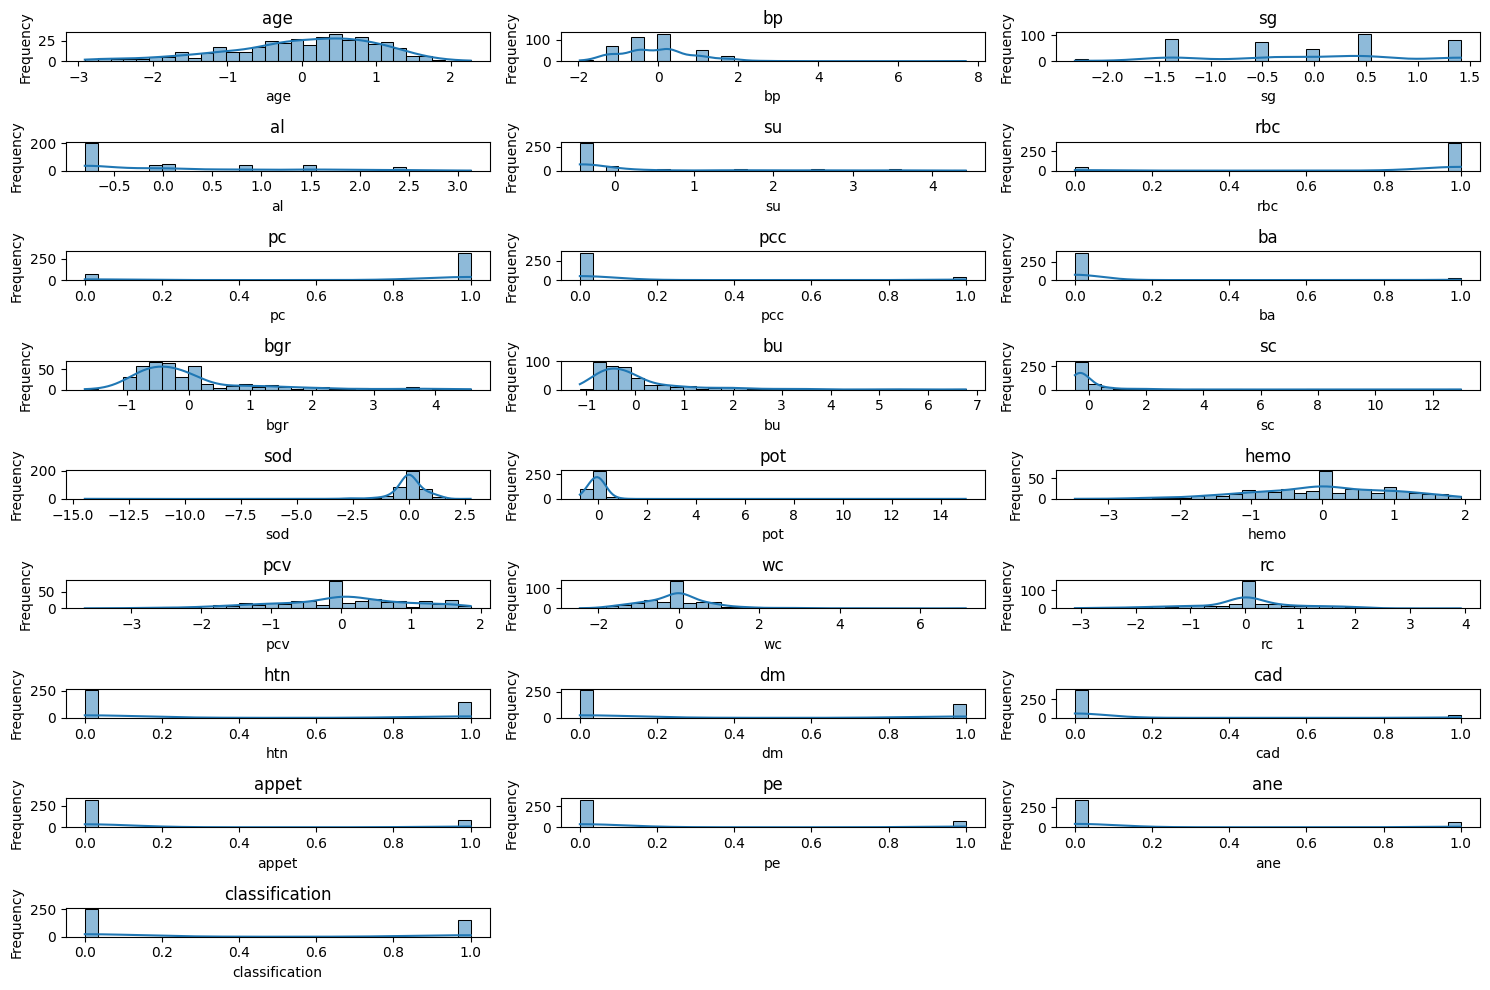

In [357]:
# Convert data types to float for numerical columns
#df[names[:-1]] = df[names[:-1]].astype(float)

# Set the size of the plots
plt.figure(figsize=(15, 10))
n_columns=3
n_lines= (len(names)//n_columns)+1

# Plot histograms for each column
for i, column in enumerate(names):
    plt.subplot(n_lines , n_columns, i + 1)  # 2 rows, 3 columns
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [358]:
df1=df

    data_banknote_authentication

In [359]:

data=[]
with open('data_banknote_authentication.txt', "r") as doc:
    for line in doc:
        line=line.replace('\n','')
        data.append(line.split(','))

names=['variance','skewness','curtosis','entropy','class']
df= pd.DataFrame(data, columns=names )
df


,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.4621,0
2,3.866,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0
...,...,...,...,...,...
1367,0.40614,1.3492,-1.4501,-0.55949,1
1368,-1.3887,-4.8773,6.4774,0.34179,1
1369,-3.7503,-13.4586,17.5932,-2.7771,1
1370,-3.5637,-8.3827,12.393,-1.2823,1


In [360]:
# see the first columns to get familiar with the data 
num_rows_to_see=10
df.head(num_rows_to_see)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.4621,0
2,3.866,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0
5,4.3684,9.6718,-3.9606,-3.1625,0
6,3.5912,3.0129,0.72888,0.56421,0
7,2.0922,-6.81,8.4636,-0.60216,0
8,3.2032,5.7588,-0.75345,-0.61251,0
9,1.5356,9.1772,-2.2718,-0.73535,0


In [361]:
# get the columns of the data frame and see the set of values for each column 
for col in df.columns: 
    print(f'The values of {col} are = \n', df[col].unique())




The values of variance are = 
 ['3.6216' '4.5459' '3.866' ... '-3.7503' '-3.5637' '-2.5419']
The values of skewness are = 
 ['8.6661' '8.1674' '-2.6383' ... '-13.4586' '-8.3827' '-0.65804']
The values of curtosis are = 
 ['-2.8073' '-2.4586' '1.9242' ... '17.5932' '12.393' '2.6842']
The values of entropy are = 
 ['-0.44699' '-1.4621' '0.10645' ... '-1.2953' '-0.55949' '-2.7771']
The values of class are = 
 ['0' '1']


Assumonng that there is no disturbing value 

In [362]:
# convert numerical calumns to float 
numerical_columns = names
for col in numerical_columns:
    # Convert to numeric, forcing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    
    # Handle NaN values (choose one of the options below) Fill NaN with the mean of the column
    df[col].fillna(df[col].mean(), inplace=True)
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18912\3258707760.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [363]:
#normalise the data 
numeric_columns= ['variance','skewness','curtosis','entropy']
for col in numeric_columns: 
    mean = df[ col].mean()
    std = df[col].std()
    df[col]= (df[col]-mean)/std
df

,variance,skewness,curtosis,entropy,class
0,1.121397,1.149036,-0.975614,0.354432,0
1,1.446538,1.064065,-0.894710,-0.128721,0
2,1.207369,-0.777069,0.122174,0.617848,0
3,1.063355,1.295005,-1.254940,-1.143612,0
4,-0.036758,-1.086642,0.736462,0.096552,0
...,...,...,...,...,...
1367,-0.009707,-0.097657,-0.660721,0.300887,1
1368,-0.641079,-1.158562,1.178593,0.729861,1
1369,-1.471820,-2.620690,3.757647,-0.754609,1
1370,-1.406180,-1.755831,2.551113,-0.043143,1


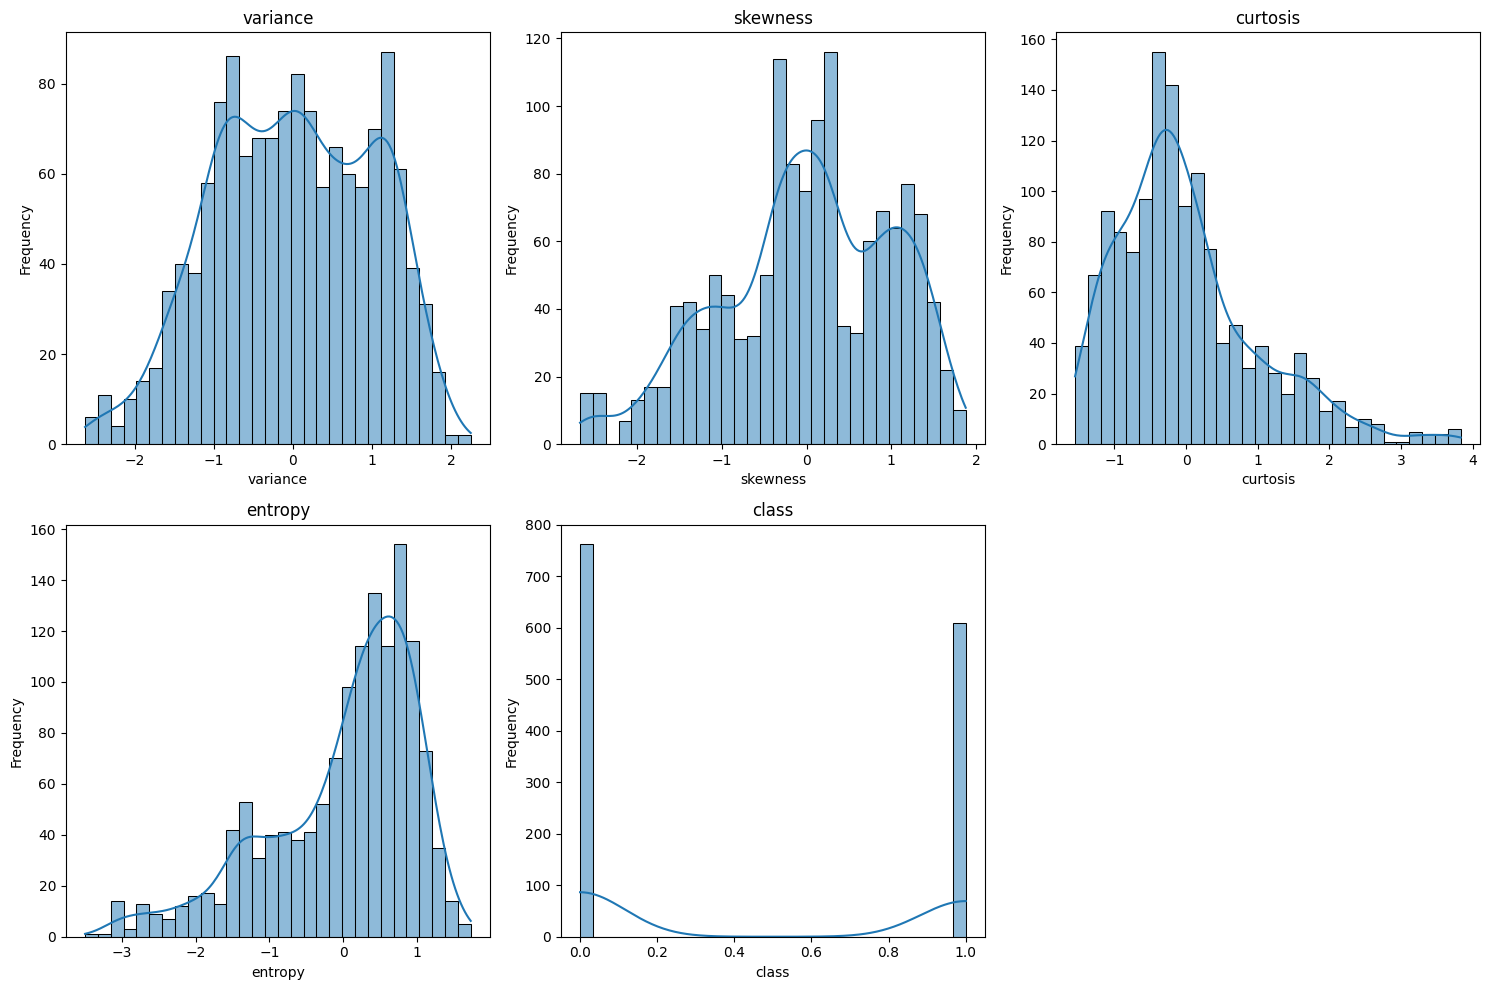

In [364]:
# Convert data types to float for numerical columns
df[names[:-1]] = df[names[:-1]].astype(float)

# Set the size of the plots
plt.figure(figsize=(15, 10))
n_columns=3
n_lines= (len(names)//n_columns)+1

# Plot histograms for each column
for i, column in enumerate(names):
    plt.subplot(n_lines , n_columns, i + 1)  # 2 rows, 3 columns
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [365]:
df2=df

Store dta frames

In [369]:
import pandas as pd

# Suppose df1 et df2 sont déjà définis comme des DataFrames chargés.
infos = {'kidney_disease.csv': df1, 'data_banknote_authentication.txt': df2}
num_parts = 10

for name, df in infos.items(): 
    # Étape 1: Écriture du DataFrame dans un fichier texte
    with open(name[:-4] + '_edited' + name[-4:], 'w') as file:
        X = df.to_numpy()
        # Écrire les données ligne par ligne
        for i in range(X.shape[0]):
            # Joindre les éléments de la ligne X en une chaîne
            x_row = ', '.join(f'{value}' for value in X[i])
            # Écrire dans le fichier
            file.write(f'{x_row}\n')  
    
    # Étape 3: Préparer les lignes pour la division
    lines = [', '.join(map(str, row)) for row in X]  # Convertir les lignes du tableau numpy en chaînes
    split_size = len(lines) // num_parts
    remainder = len(lines) % num_parts  # Calculer le reste pour gérer les divisions inégales

    # Étape 4: Créer des ensembles d'entraînement et de test
    for i in range(num_parts):
        # Déterminer les indices de début et de fin pour l'ensemble de test
        start_index = i * split_size
        end_index = start_index + split_size

        # Ajouter les lignes restantes à l'ensemble de test final
        if i == num_parts - 1:
            end_index += remainder  # Ajouter le reste à la dernière division
        
        # Créer des ensembles de test et d'entraînement
        test_data = lines[start_index:end_index]
        train_data = lines[:start_index] + lines[end_index:]  # Combiner les lignes restantes pour l'ensemble d'entraînement
        
        # Étape 5: Écrire les données de test dans un fichier
        with open(f'test_{name[:-4]}_{i}{name[-4:]}', 'w') as test_file:
            test_file.writelines(f'{line}\n' for line in test_data)
        
        # Écrire les données d'entraînement dans un fichier
        with open(f'train_{name[:-4]}_{i}{name[-4:]}', 'w') as train_file:
            train_file.writelines(f'{line}\n' for line in train_data)
